In [1]:
library(tidyverse)
library(ggplot2)
library(hrbrthemes)
library(ggpubr)
library(patchwork)
library(extrafont)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registering fonts with R



In [2]:
insculationScore <- function(mat, name) {
    num = dim(mat)[1]
    w = 5
    scores = c()
    for (i in (w+1):(num-w)) {
      score = sum(mat[(i-w):i,i:(i+w)])
        scores = c(scores, score)
    }
    data = tibble(i = seq_along(scores) + w, name=scores)
    return(data)
}

In [3]:
matrix_data = read.table("../data/wildtype/orca_predictions_16Mb.txt", sep = "\t")
obsexp = as.matrix(matrix_data)
colnames(obsexp) <- NULL
matrix_data = read.table("../data/wildtype/orca_normmats_16Mb.txt", sep = "\t")
expected = as.matrix(matrix_data)
colnames(expected) <- NULL

In [4]:
predicted = obsexp + log(expected)

In [8]:
num = dim(predicted)[1]
w = 5
scores = c()
for (i in (w+1):(num-w)) {
  score = sum(predicted[(i-w):i,i:(i+w)])
    scores = c(scores, score)
}
precontacts = tibble(pos = seq_along(scores) + w, predicted=scores)
data <- precontacts

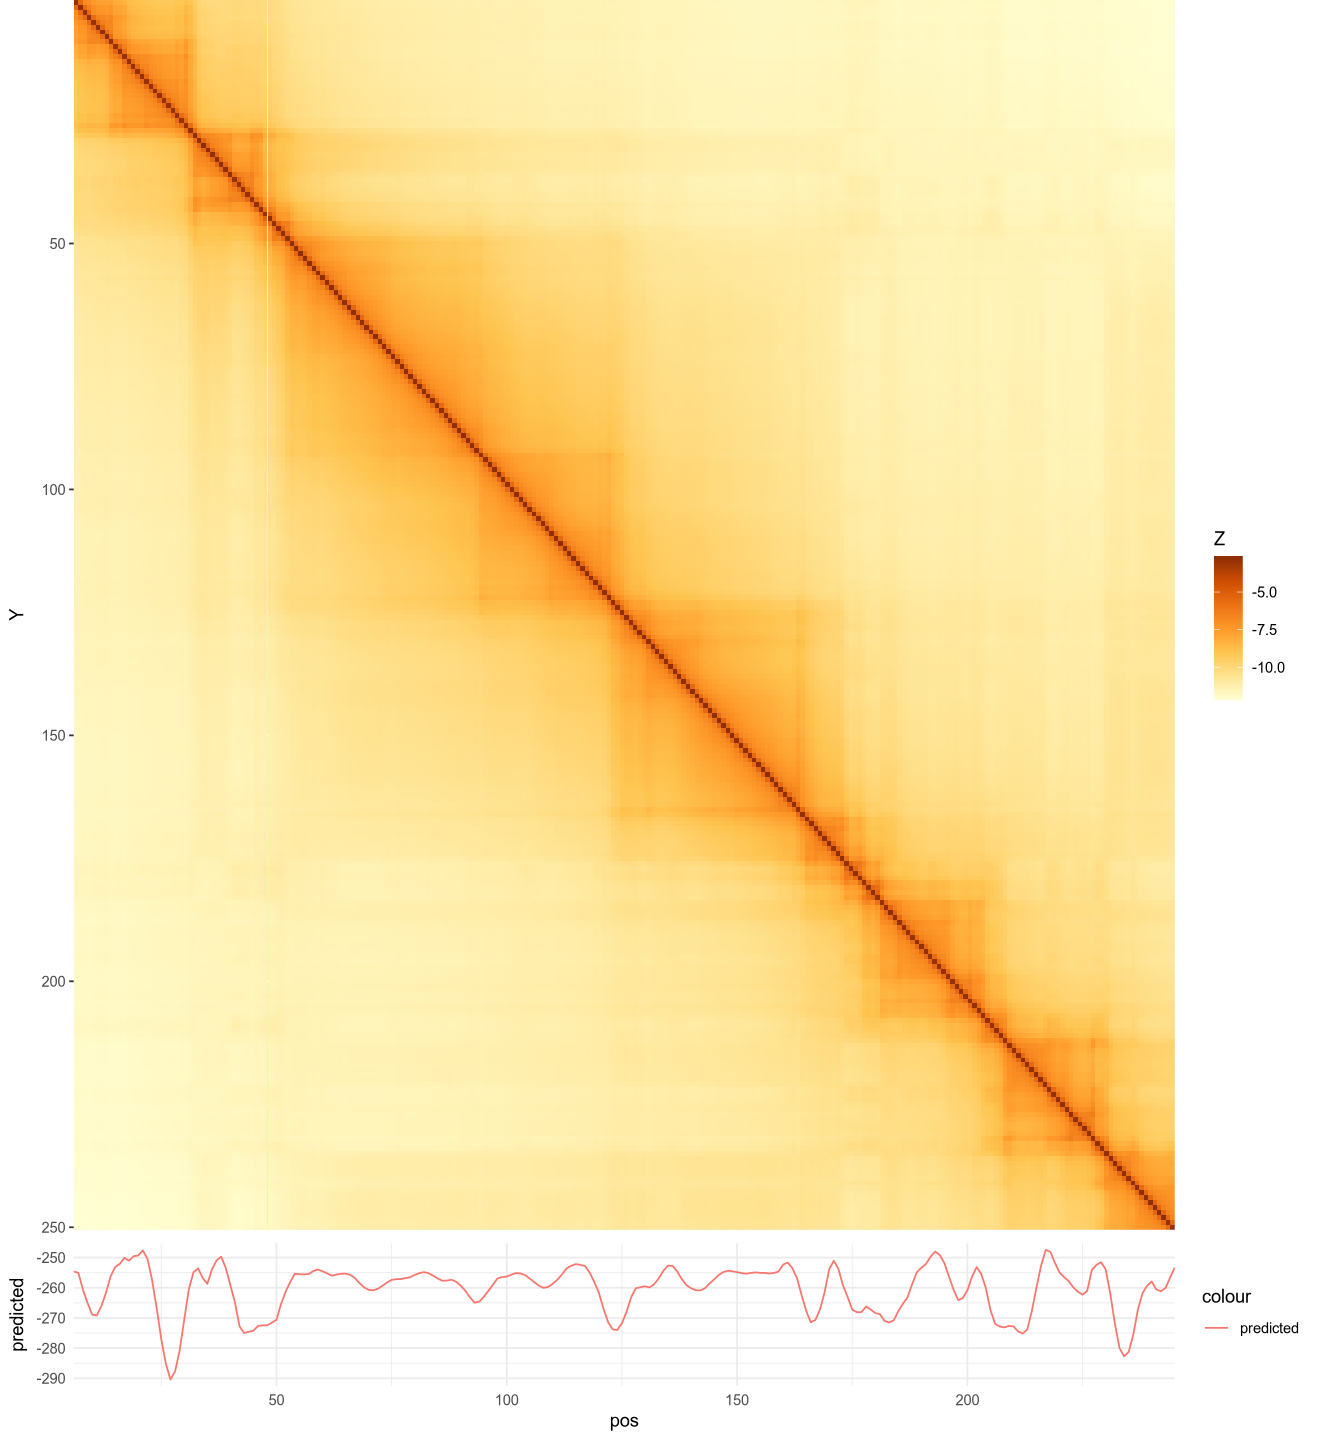

In [9]:
plotmat = predicted
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = plotmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    #theme_ipsum() +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))
#legend.position="none",
p2 = data %>% ggplot(aes(x=pos)) +
         geom_line(aes(y = predicted, colour = "predicted")) +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

### Orca prediction observed/expected

In [10]:
matrix_data =  read.table("../data/wildtype/orca_predictions_16Mb.txt", sep = "\t")
pmat = as.matrix(matrix_data)
colnames(pmat) <- NULL

In [13]:
num = dim(pmat)[1]
w = 5
scores = c()
for (i in (w+1):(num-w)) {
  score = sum(pmat[(i-w):i,i:(i+w)])
    scores = c(scores, score)
}
wildtype = tibble(pos = seq_along(scores) + w, wildtype=scores)
data <- wildtype

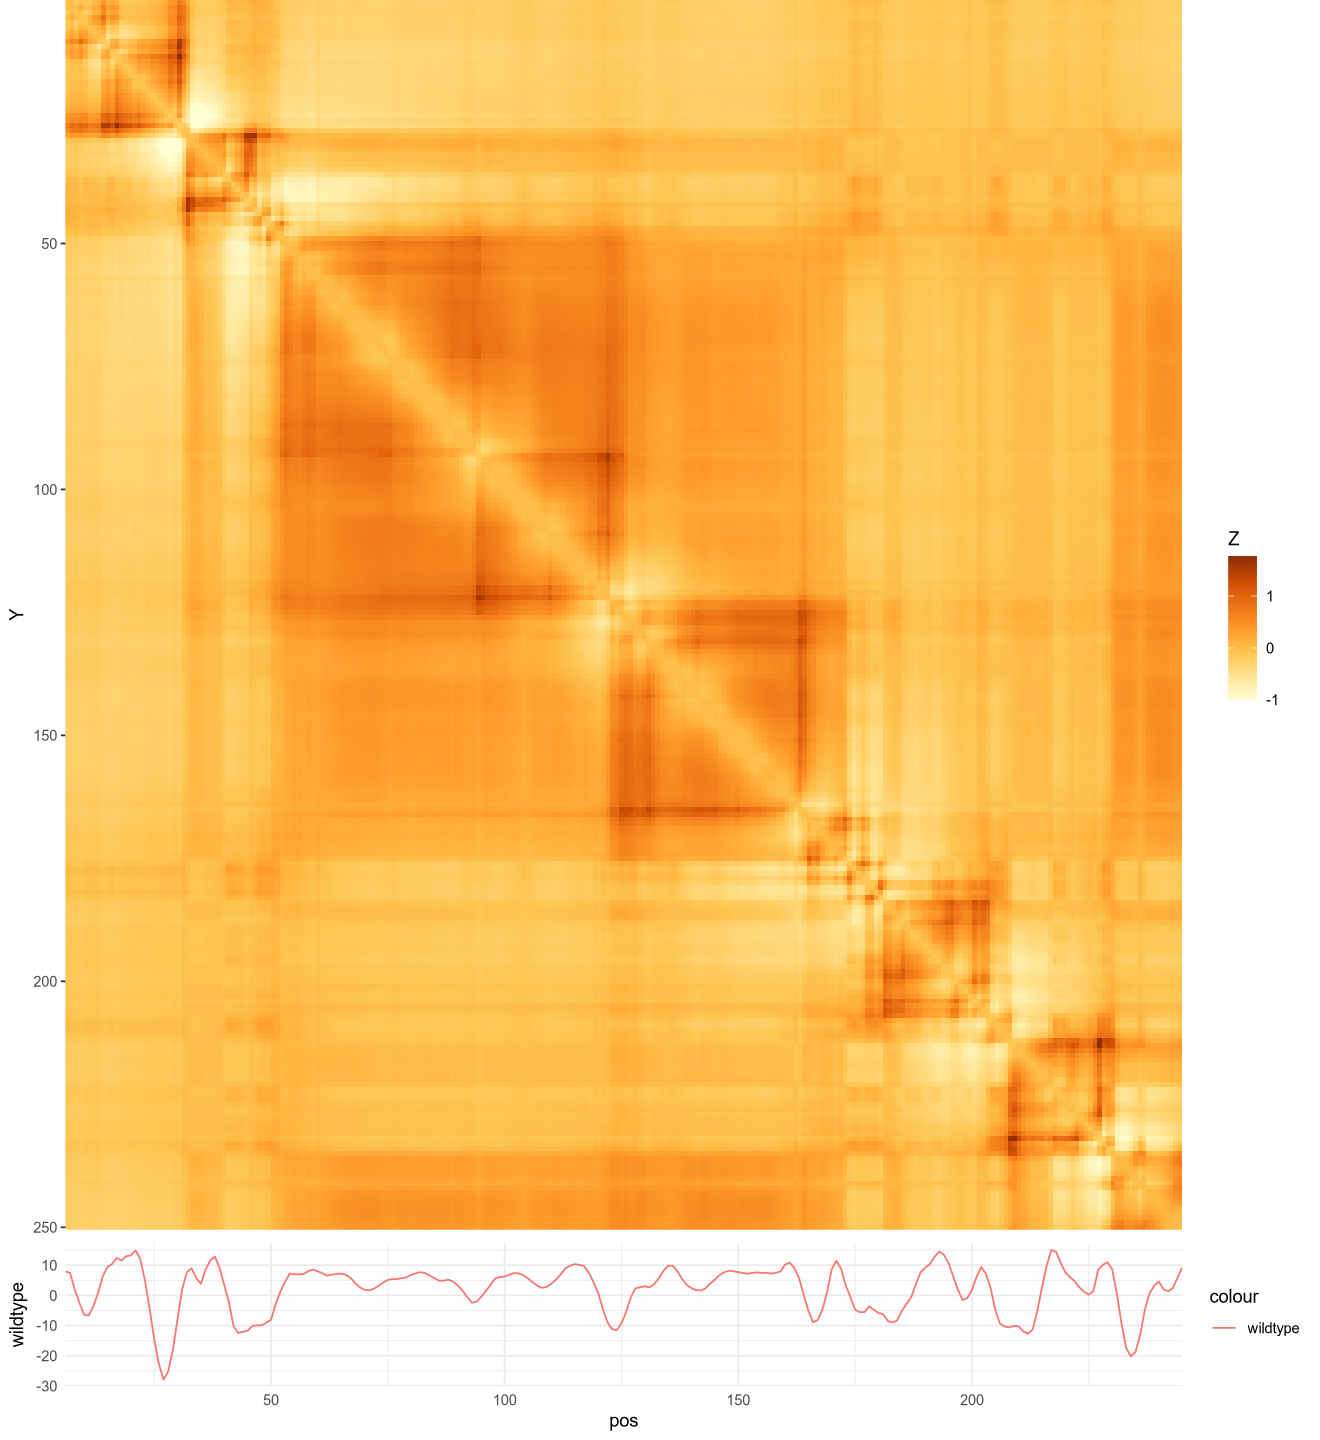

In [14]:
vmin=-1
plotmat = pmat
plotmat[plotmat<vmin] = vmin
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = plotmat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    #theme_ipsum() +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))
#legend.position="none",
p2 = data %>% ggplot(aes(x=pos)) +
         geom_line(aes(y = wildtype, colour = "wildtype")) +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")

### Compartiments

In [15]:
matrix_data =  read.table("../data/wildtype/orca_predictions_16Mb.txt", sep = "\t")
pmat = as.matrix(matrix_data)
colnames(pmat) <- NULL

In [16]:
cormat = cor(pmat, method = "pearson")
eigen_result <- eigen(cormat)

eigenvalues <- eigen_result$values
eigenvectors <- eigen_result$vectors

PC1 = eigenvectors[,1]
compart = tibble(pos = seq_along(PC1), pc1=PC1)

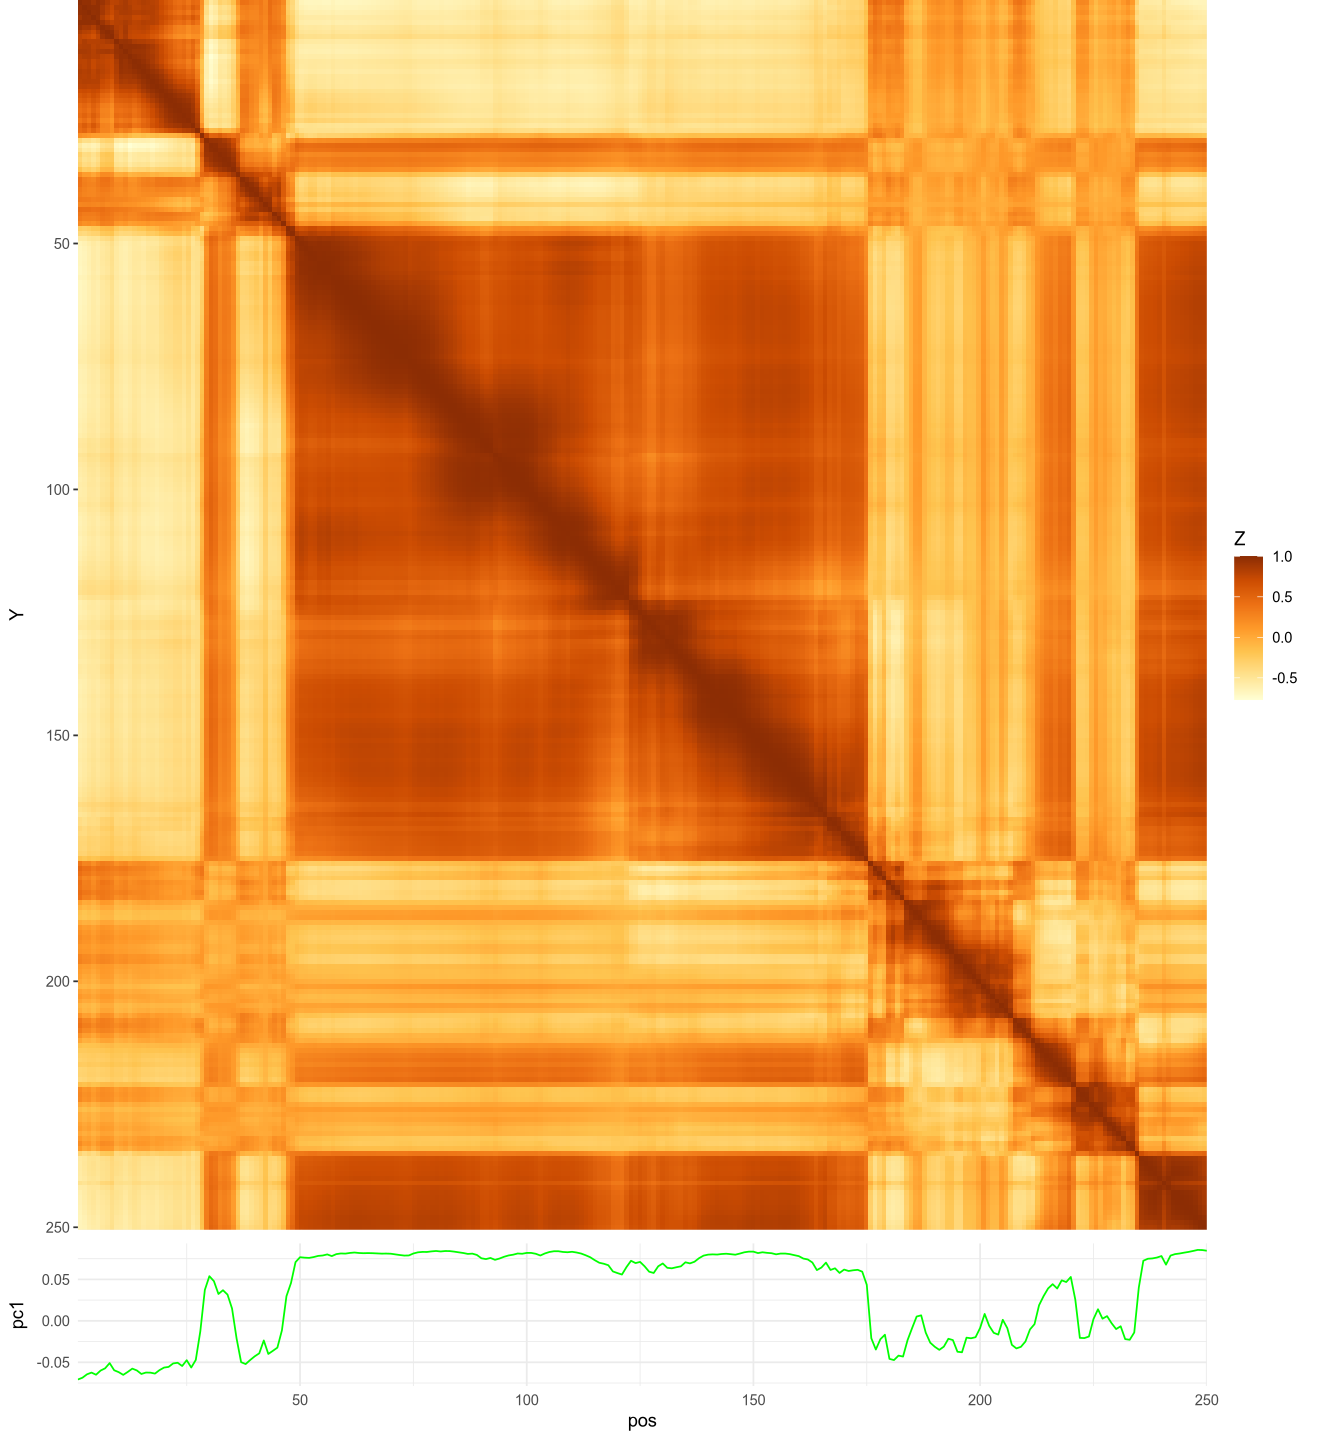

In [17]:
# Make plots wider 
options(repr.plot.width=11, repr.plot.height=12)
p1 = cormat %>% as_tibble() %>%
  rowid_to_column(var="X") %>%
  gather(key="Y", value="Z", -1) %>%
  # Change Y to numeric
  mutate(Y=as.numeric(gsub("V","",Y))) %>%
 # Viz
  ggplot(aes(X, Y, fill= Z)) + 
    geom_tile() +
    #scale_x_continuous(expand = c(0.5, 0)) +
    scale_fill_distiller(palette = "YlOrBr", direction=1) +
    scale_y_reverse() +
    coord_cartesian(expand = FALSE) +
    theme(#legend.position="none",
          axis.title.x=element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          plot.margin = margin(0,0,0,0, 'cm'))

p2 = compart %>% ggplot(aes(x=pos, y=pc1)) +
         geom_line(color="green") +
         scale_x_continuous(expand = c(0, 0)) +
         theme_minimal()

ggarrange(p1, p2, heights = c(3, 0.5), nrow = 2, align = "v")